
# Project: Soccer Database
### (original source on Kaggle)

## Table of Contents
 <ul>
 <li><a href="#intro">Introduction</a></li>
 <li><a href="#wrangling">Data Wrangling</a></li>
 <li><a href="#cleaning">Data Cleaning</a></li>
 <li><a href="#eda">Exploratory Data Analysis</a></li>
 <li><a href="#conclusions">Conclusions</a></li>
 </ul>

<a id='intro'></a>
## Introduction


#### Description
#### The ultimate Soccer database for data analysis and machine learning

- What you get:

    - +25,000 matches
    - +10,000 players
    - 11 European Countries with their lead championship
    - Seasons 2008 to 2016
    - Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
    - Team line up with squad formation (X, Y coordinates)
    - Betting odds from up to 10 providers
    - Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

*16th Oct 2016: New table containing teams' attributes from FIFA !

Original Data Source:

You can easily find data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier. I must insist that you do not make any commercial use of the data. The data was sourced from:

 - Scores, lineup, team formation and events [from here](http://football-data.mx-api.enetscores.com)

 - Betting odds: If you want to understand the column naming system for betting odds [from here](http://www.football-data.co.uk/)

 - Players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports. [from here](http://sofifa.com/)

---
---
---
### Questions to be answered in EDA

### Questions about teams 

#### (Research Question 1) What team attributes lead to the most victories?
#### (Research Question 2) What are the top 5 teams that improved the most over the time period ? 
#### (Research Question 3) What team scored the most over the time period ?

### Questions about player

#### (Research Question 4) Which players had the most penalties? 
#### (Research Question 5) What player attributes lead to the highest overall rating ?
#### (Research Question 6) Does  players' Footedness affect their potential ?

In [5]:
import pandas as pd
import numpy as np
import requests
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## some the following cell does not run if chained_assignment in on so we will turn it off 
pd.options.mode.chained_assignment = None 

#### the Following cell needs to be used one time only 

In [ ]:
# ## Using Requests library to download a file 
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4cad_database/database.sqlite'
# response = requests.get(url)
# with open('database.sqlite','wb') as outfile:
#     outfile.write(response.content)

In [ ]:
## importing database file 
db = sqlite3.connect('database.sqlite')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Essential information needed about database layout 


 |Table                   |Total Rows   |Total Columns            |
 | -----------            | ----------- | ----------------------  |
 | Country                | 11          |          2              |
 | League                 | 11          |          3              |
 | Match                  | 25979       |          115            |
 | Player                 | 11060       |           7             |
 | Player_Attributes      | 183978      |          42             |
 | Team                   | 299         |           5             |
 | Team_Attributes        | 1458        |          25             |                

#### reading all tables of `'database.sqlite'` file  into Pandas Dataframes and then choosing the needed data 

In [ ]:
## Dataframe for countrys
soccer_country = pd.read_sql_query('SELECT * from Country', db)
soccer_country

In [ ]:
# soccer_country.info()

In [ ]:
## Dataframe for Leagues
soccer_league = pd.read_sql_query('SELECT * from League', db)
soccer_league

In [ ]:
# soccer_league.info()

In [ ]:
### Dataframe for Matches
soccer_match = pd.read_sql_query('SELECT * from Match', db)
soccer_match 

In [ ]:
soccer_match.info()

In [ ]:
list(soccer_match.columns)

In [ ]:
soccer_match.date.value_counts()

In [ ]:
### Dataframe for players
soccer_player = pd.read_sql_query('SELECT * from Player', db)
soccer_player

In [ ]:
soccer_player.info()

In [ ]:
### Dataframe for Players' Attributes
soccer_player_att = pd.read_sql_query('SELECT * from Player_Attributes', db)
soccer_player_att

In [ ]:
soccer_player_att.info()

In [ ]:
### Dataframe for Teams
soccer_team = pd.read_sql_query('SELECT * from Team', db)
soccer_team 

In [ ]:
soccer_team.info()

In [ ]:
soccer_team.head()

In [ ]:
### Dataframe for Teams' Attributes
soccer_team_att = pd.read_sql_query('SELECT * from Team_Attributes', db)
soccer_team_att

In [ ]:
soccer_team_att.info()

#### Dataframes  needed 
| Pandas Dataframes Name  | `database.sqlite`Table Name | Total Rows  | Total Columns           |
| -----------             | -------------------         | ----------- | ----------------------  |
| soccer_player           | Player                      | 11060       |           7             |
| soccer_player_att       | Player_Attributes           | 183978      |          42             |
| soccer_team             | Team                        | 299         |           5             |
| soccer_team_att         | Team_Attributes             | 1458        |          25             |    
| soccer_team_att         | Team_Attributes             | 1458        |          25             |
| soccer_match            | Match                       | 25979       |          115            |

<a id="cleaning"></a>
### Data Cleaning (Part 1)
   - dealing with data tidiness issues 

We will start first with teams dataset

`soccer_team_att[buildUpPlayDribbling]` column has so much missing values let us drop it

In [ ]:
del soccer_team_att['buildUpPlayDribbling']

In [ ]:
soccer_team_att.info()

dropping duplicates

In [ ]:
soccer_team_att[soccer_team_att.duplicated()]

In [ ]:
soccer_team[soccer_team.duplicated()]

dropping null values

In [ ]:
soccer_team_att = soccer_team_att.dropna()
soccer_team = soccer_team.dropna()

In [ ]:
soccer_team_att.info()

In [ ]:
soccer_team.info()

`soccer_team['team_fifa_api_id']` column has inconsistent datatype 'float' will remove it and coninue with
`soccer_team['team_api_id']`

In [ ]:
del soccer_team['team_fifa_api_id']

In [ ]:
soccer_team.info()

finding teams who are not common in both `soccer_team` & `soccer_team_att` by `'team_api_id'` column

In [ ]:
soccer_team['team_api_id'].nunique()

In [ ]:
soccer_team_att['team_api_id'].nunique()

checking for uncommon teams in both datasets again

In [ ]:
not_comm_teams = []
for value in soccer_team['team_api_id'].values:
    if value not in soccer_team_att['team_api_id'].values:
        not_comm_teams.append(value)

In [ ]:
not_comm_teams

there are no uncommon teams in both `soccer_team` & `soccer_team_att` let us proceed


After that we need to incorporate data from `soccer_team` & `soccer_team_att` into one dataframe 

`pd.merge` will not be sufficient because that we have repeated values in the  `soccer_team_att`  related to the varios time periods for each team 


   - 1) Slice the `soccer_team_att` dataframe into small dataframes according to the `team_api_id` values  
   - 2) Add new column to each small dataframe 
   - 3) Use the `np.repeat` function to fill those two columns using values from`soccer_team[team_long_name]` &`soccer_team[team_short_name]` columns
   
   - 4) Append all small dataframes into the product dataframe `team_df`
   
----
- the product dataframe `team_df` will have two additional columns compared to  `soccer_team_att`  dataframe which are `team_long_name` `team_short_name`


In [ ]:
for valu in soccer_team['team_api_id'].values :
        small_df = soccer_team_att[soccer_team_att['team_api_id'] == valu]  
        col_Names = ['team_long_name','team_short_name']
        for col_name in col_Names :
            team_long = np.repeat(soccer_team[soccer_team['team_api_id'] == valu ][col_name].iloc[0],small_df.shape[0])
            small_df[col_name] = team_long
        break 

In [ ]:
### getting ourselves an empty dataframe for free
team_df_1 = small_df[small_df.duplicated()]
team_df_1

In [ ]:
for valu in soccer_team['team_api_id'].values :
        small_df = soccer_team_att[soccer_team_att['team_api_id'] == valu]  
        team_long = np.repeat(soccer_team[soccer_team['team_api_id'] == valu ]['team_long_name'].iloc[0],small_df.shape[0])
        team_short = np.repeat(soccer_team[soccer_team['team_api_id'] == valu ]['team_short_name'].iloc[0],small_df.shape[0])
        small_df['team_long_name'] = team_long
        small_df['team_short_name'] =  team_short
        team_df_1 = team_df_1.append(small_df)

In [ ]:
team_df_1

will add a new column for each teams' goals in a year called `goals_year` but first will make a `year` column and import the scores from `soccer_match` dataframe

In [ ]:
team_df_1['year'] = team_df_1['date'].apply(lambda x : x.split('-')[0])

In [ ]:
team_df_1[0:10]
## or simply 
#team_df_1.head(10)

In [ ]:
team_df_1['year'] = team_df_1['year'].astype(int) 

will do a year column also for `soccer_match` to enable use pick scores easily 

In [ ]:
soccer_match['year'] = soccer_match['date'].apply(lambda x : x.split('-')[0])

In [ ]:
soccer_match['year'] = soccer_match['year'].astype(int) 

In [ ]:
soccer_match.info()

- then well do a loop that goes through `team_api_id` column from `team_df_1` dataframe and matches it with `home_team_api_id` & `away_team_api_id` columns in `soccer_match` dataframe  and if it matches :
     - then it will check if there are any goals in the `home_team_goal`& `away_team_goal` columns from the same dataframe for the same `year`
         
        -  then it will be added in the `goals_year` column of `teams_scores_f` dataframe

In [ ]:
### making a list of all unique years 
year_list = list(set(team_df_1['year']))
year_list

In [ ]:
teams_scores_f = pd.DataFrame({'team_api_id': [], 'goals_year': [] , 'year': []})

for year_1 in year_list:
    inner_df_1_team_y = team_df_1[team_df_1['year'] == year_1]
    inner_df_1_match_y = soccer_match[soccer_match['year'] == year_1]
    for api_id in inner_df_1_team_y['team_api_id'].unique():
                home = inner_df_1_match_y[inner_df_1_match_y['home_team_api_id'] == api_id].home_team_goal.sum()
                away = inner_df_1_match_y[inner_df_1_match_y['away_team_api_id'] == api_id].away_team_goal.sum()
                total_team_score_y = home + away
                teams_scores = pd.DataFrame({'team_api_id': [api_id], 'goals_year': [total_team_score_y] , 'year': [year_1]})
                teams_scores_f = teams_scores_f.append(teams_scores)
  

In [ ]:
teams_scores_f = teams_scores_f.astype(int)

returning back to our `team_df_1` which we will use to add total goals in  `goals_year` column for every team in each year in a whole new dataframe :

will add scores to `goals_year`in `team_df_1` dataframe with the following manner:
   - make small dataframe each has the same `team_api_id` values using `team_df_1`dataframe
   - make small dataframe each has the same `team_api_id` values using `teams_scores_f`dataframe
   - merge the last two dataframes in to a small final dataframes
   - through a loop will append all dataframes produced in the last step into a last df

In [ ]:
for api_id in teams_scores_f['team_api_id']:
    df1 = team_df_1[team_df_1['team_api_id'] == api_id]
    df2 = teams_scores_f[teams_scores_f['team_api_id'] == api_id]
    df2.pop('team_api_id')
    df3 = pd.merge(df1, df2, on="year")
    break    
### getting an empty  dataframe from the same labels and size
team_df_2 = df3[df3.duplicated()]
   


In [ ]:
for api_id in teams_scores_f['team_api_id']:
    df1 = team_df_1[team_df_1['team_api_id'] == api_id]
    df2 = teams_scores_f[teams_scores_f['team_api_id'] == api_id]
    df2.pop('team_api_id')
    df3 = pd.merge(df1, df2, on="year")
    team_df_2 = team_df_2.append(df3)

In [ ]:
team_df_2 = team_df_2.drop_duplicates()

In [ ]:
team_df_2

saving the `team_df` into a flat file 

In [ ]:
team_df_2.to_csv('team_df_v1.csv' , index = False)

###### Second we will deal with players datasets


Merging `soccer_player` & `soccer_player_att ` dataframes will not be effecient because of the iteration needed in the product dataframe especially every player has got various periods of performance  ...so we will go around that performing the following steps:

   - 1) Slice the `soccer_player_att` dataframe into small dataframes according to the `player_api_id` values  
   - 2) Add the missing columns to each small dataframe 
   - 3) Use the `np.repeat` function to fill those columns using values from `soccer_player` columns
   
   - 4) Append all small dataframes into the product dataframe `player_df`
   
----
- the product dataframe `player_df` will have  additional columns compared to  `soccer_player_att`  dataframe which 

---

-  will drop players that are not common in both  `soccer_player` & `soccer_player_att ` datasets


     - but first we check for duplicates and NaNs in both dataframes

In [ ]:
soccer_player['player_fifa_api_id'].value_counts().count()
## or simply 
#soccer_player['player_fifa_api_id'].nunique()

In [ ]:
soccer_player_att['player_fifa_api_id'].value_counts().count()
## or simply 
#soccer_player_att['player_fifa_api_id'].nunique()

In [ ]:
soccer_player_att[soccer_player_att.duplicated()]

In [ ]:
soccer_player[soccer_player.duplicated()]

- as we checked earlier there are no duplicates in both `soccer_player` & `soccer_player_att` dataframes
- let's drop all Nan Values from them both 

In [ ]:
## dropping null values
soccer_player = soccer_player.dropna()
soccer_player_att = soccer_player_att.dropna()

In [ ]:
## saving dataframes to flat files 
soccer_player.to_csv('soccer_player_fl.csv', index = False)
soccer_player_att.to_csv('soccer_player_att_fl.csv', index = False)

In [ ]:
### loading to dataframes
soccer_player_edited = pd.read_csv('soccer_player_fl.csv')
soccer_player_att_edited = pd.read_csv('soccer_player_att_fl.csv')

- All columns that we need from `soccer_player_edited`dataframe to add to `soccer_player_att_edited`  dataframe slices_edited are `['player_name','birthday','height','weight']`

so let's merge the needed columns from `soccer_player_edited` to our `soccer_player_att_edited` 

In [ ]:
soccer_player_edited.info()

In [ ]:
soccer_player_att_edited.info()

In [ ]:
columns_required = ['player_fifa_api_id','player_name','birthday','height','weight']

In [ ]:
soccer_player_all = soccer_player_edited[columns_required].merge(soccer_player_att_edited, on = 'player_fifa_api_id')

In [ ]:
soccer_player_all

In [ ]:
soccer_player_all['player_fifa_api_id'].value_counts().count()

--- 
thanks for the note that was really helpful :)

---

In [ ]:
soccer_player_all.to_csv('player_df_V1.csv',index= False)

### Data Cleaning (Part 2)
   - dealing with data quality issues
 
starting with teams dataset first and then player dataset

In [ ]:
team_df_f = pd.read_csv('team_df_v1.csv')

In [ ]:
team_df_f.info()

In [ ]:
team_df_f.describe()

let's have a better look  inside every column to know which values need to be converted to more consistent type 
specially non-numeric type except `team_long_name `&`team_short_name`

In [ ]:
non_numeric = ['date' , 'buildUpPlaySpeedClass' , 'buildUpPlayDribblingClass' , 'buildUpPlayPassingClass' ,\
               'buildUpPlayPositioningClass' , 'chanceCreationPassingClass', 'chanceCreationCrossingClass' ,\
              'chanceCreationShootingClass' , 'chanceCreationPositioningClass','defencePressureClass',\
               'defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass']
for col in non_numeric :
    look = team_df_f[col].value_counts()
    print(look)

team dataset  is ready let's save it in a clean final flat file before analysis 

In [ ]:
team_df_f.to_csv('team_clean.csv',index = False)

----
----
---

now will have a look on player dataset

In [ ]:
player_df_f = pd.read_csv('player_df_V1.csv')

In [ ]:
player_df_f.info()

In [ ]:
player_df_f.describe()

`penalties` has to be an integer

In [ ]:
player_df_f['penalties'] = player_df_f['penalties'].astype(int)

let's have a good look inside every non-numeric column 
  - there are only 6 of them here

In [ ]:
non_numeric_1 = ['date' ,'preferred_foot','attacking_work_rate','defensive_work_rate' , 'birthday']
for col in non_numeric_1 :
    look = player_df_f[col].value_counts()
    print(look)

- `date`: needs to be converted to datetime object 
---
- `birthday`: needs to be converted to datetime object
---


- the next two columns have plenty of common and scattered data between them so we will 
   deal with them in a conjugated manner   explaining every step

    -  `attacking_work_rate` : has plenty of representations for the same values 
          while the actual representations are (high , low , medium , None) 

    -  `defensive_work_rate` : has the same previous problem 

`date` column 

In [ ]:
player_df_f['date'] = player_df_f['date'].apply(lambda x : x.split(' ')[0])

In [ ]:
player_df_f.date[0]

In [ ]:
player_df_f['date'] =  pd.to_datetime(player_df_f['date'], format='%Y-%m-%d')

In [ ]:
player_df_f.date

`birthday` column 

In [ ]:
player_df_f['birthday'] = player_df_f['birthday'].apply(lambda x : x.split(' ')[0])

In [ ]:
player_df_f.birthday[0]

In [ ]:
player_df_f['birthday'] =  pd.to_datetime(player_df_f['birthday'], format='%Y-%m-%d')

In [ ]:
player_df_f.birthday

 `attacking_work_rate` &   `defensive_work_rate`  columns 

In [ ]:
 player_df_f['attacking_work_rate'].value_counts()

In [ ]:
player_df_f['defensive_work_rate'].value_counts()


 first i discovered scattered values between the two columns as the following table shows :
 

   
   
| Column Name             | Value                       | Value Count | Conclusion                             |
| -----------             | -------------------         | ----------- | ----------------------                 |
|`attacking_work_rate`    |         y                   |    94       |                                        |
|`defensive_work_rate`    |         es                  |    94       |the two values are the same = 'yes'     |
|`attacking_work_rate`    |        stoc                 |    86       |                                        | 
|`defensive_work_rate`    |        tocky                |    86       |the two values are the same = 'stocky'  |  
|`attacking_work_rate`    |        le                   |    78       |                                        |
|`defensive_work_rate`    |        ean                  |    78       |the two values are the same = 'lean'    |
|`attacking_work_rate`    |        norm                 |    317      |                                        |
|`defensive_work_rate`    |        ormal                |    317      |the two values are the same = 'normal'  | 

- the 'yes' will be replaced with 'medium' 
- the 'normal' will be replaced with 'medium' 

after some search on google 'lean' means weak performance so :

- 'lean' will be replaced with 'low'

after some search on google 'stocky' means high performance so :

- 'stocky' will be replaced with 'high'

----

In [ ]:
player_df_f['attacking_work_rate'].replace(['y' ,'norm'],'medium', inplace = True)

In [ ]:
player_df_f['attacking_work_rate'].value_counts()

In [ ]:
player_df_f[player_df_f['attacking_work_rate']== 'y'] 

In [ ]:
player_df_f[player_df_f['attacking_work_rate']== 'norm'] 

In [ ]:
player_df_f['attacking_work_rate'].replace(['stoc'],'high', inplace = True)

In [ ]:
player_df_f[player_df_f['attacking_work_rate']== 'stoc'] 

In [ ]:
player_df_f['attacking_work_rate'].replace(['le'],'low', inplace = True)

In [ ]:
player_df_f[player_df_f['attacking_work_rate']== 'le'] 

In [ ]:
player_df_f['defensive_work_rate'].replace(['es' ,'ormal'],'medium', inplace = True)

In [ ]:
player_df_f['defensive_work_rate'].replace(['tocky'],'high', inplace = True)

In [ ]:
player_df_f['defensive_work_rate'].replace(['ean'],'low', inplace = True)

seems also that `defensive_work_rate` column has data of scale from 0 to 9 related to the player defensive work 
so we will :
- consider players with the value of     '4'&'5' as 'medium' 
- consider players with the value above  '5' as 'high'
- consider players with the value below  '4' as 'low' 

In [ ]:
player_df_f['defensive_work_rate'].replace(['4','5'],'medium', inplace = True)

In [ ]:
player_df_f['defensive_work_rate'].replace(['0','1','2','3'],'low', inplace = True)

In [ ]:
player_df_f['defensive_work_rate'].replace(['6','7','8','9'],'high', inplace = True)

there is an issue here which i can't identify players who have `defensive_work_rate` that equals `'o'`
so let's have a deeper look at other player data to try identifing what `'o'` refers to

In [ ]:
player_df_f[player_df_f['defensive_work_rate'] == 'o']

In [ ]:
player_df_f[player_df_f['defensive_work_rate'] == 'o'].attacking_work_rate.value_counts()

- seems like those player has no defensive work contributions nor attacking work contributions because they play in the center of the soccer field 
   - `'o'` becomes 'None'

In [ ]:
player_df_f['defensive_work_rate'].replace(['o'],'None', inplace = True)

In [ ]:
player_df_f['defensive_work_rate'].value_counts()

In [ ]:
player_df_f['attacking_work_rate'].value_counts()

i think we are done know and we can save the players dataset in a clean flat file 

In [ ]:
player_df_f.to_csv('player_clean.csv',index = False)

In [ ]:
player_df = pd.read_csv('player_clean.csv')

In [ ]:
player_df.info()

<a id='eda'></a>
## Exploratory Data Analysis


### Questions about teams 

### (Research Question 1) What team attributes lead to the most victories?

###### to answer this question we first load `'team_clean.csv' `into a dataframe

In [7]:
team_df = pd.read_csv('team_clean.csv')

to answer this question will first have a look at teams' statistics

In [8]:
team_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year,goals_year
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871,2012.506859,35.185185
std,421.032659,39179.857739,13264.869900,11.545869,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712,1.709201,24.073155
min,1.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,2010.000000,0.000000
25%,365.250000,110.000000,8457.750000,45.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,2011.000000,16.000000
50%,729.500000,485.000000,8674.000000,52.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000,38.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,2014.000000,51.000000
max,1458.000000,112513.000000,274581.000000,80.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000,121.000000


let's calculate the average for total goals scored for each team first 

In [9]:
mean = team_df['goals_year'].mean()

In [10]:
### masking our dataframe with the above average  `goals_year` value
above_av_scor = team_df[team_df['goals_year'] > mean]
### masking our dataframe with the below average  `goals_year` value
below_av_scor = team_df[team_df['goals_year'] < mean]

let's check the `chanceCreationShooting` att. mean for each group

In [11]:
above_av_scor.chanceCreationShooting.mean()

54.26422250316055

In [12]:
below_av_scor.chanceCreationShooting.mean()

53.6191904047976

----
----

let's check the `buildUpPlaySpeed` att. mean for each group

In [13]:
above_av_scor.buildUpPlaySpeed.mean()

52.72566371681416

In [14]:
below_av_scor.buildUpPlaySpeed.mean()

52.14992503748126

----
----

let's check the `buildUpPlayPassing` att. mean for each group

In [15]:
above_av_scor.buildUpPlayPassing.mean()

47.22629582806574

In [16]:
below_av_scor.buildUpPlayPassing.mean()

49.989505247376314

----
----

let's check the whole statistics for both group with the describe method

In [17]:
above_av_scor.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year,goals_year
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,744.677623,12285.932996,9038.158028,52.725664,47.226296,52.625790,54.466498,54.264223,47.017699,49.778761,52.227560,2012.515803,53.340076
std,424.193416,33231.993313,1380.928796,11.861621,10.983676,10.697168,11.205608,10.834531,10.321279,9.851446,9.543441,1.713518,14.513439
min,2.000000,1.000000,1601.000000,20.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,30.000000,2010.000000,36.000000
25%,405.500000,70.000000,8529.500000,45.000000,38.000000,47.000000,48.000000,48.000000,40.000000,44.000000,47.000000,2011.000000,43.000000
50%,771.000000,379.000000,8721.000000,53.000000,48.000000,52.000000,54.000000,54.000000,46.000000,49.000000,52.000000,2012.000000,49.000000
75%,1124.500000,1860.000000,9927.000000,63.000000,54.000000,60.000000,64.000000,63.000000,55.000000,57.000000,59.000000,2014.000000,60.000000
max,1458.000000,111974.000000,10281.000000,78.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,2015.000000,121.000000


In [18]:
below_av_scor.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,year,goals_year
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.00000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,711.500750,24135.842579,11131.314843,52.149925,49.989505,51.61919,52.860570,53.619190,44.830585,48.625187,52.136432,2012.496252,13.655172
std,416.854474,44406.709437,19501.177393,11.160648,10.605747,9.92746,10.888462,9.688487,9.993080,9.571471,9.618596,1.705291,12.737515
min,1.000000,2.000000,1601.000000,20.000000,23.000000,28.00000,20.000000,23.000000,23.000000,24.000000,29.000000,2010.000000,0.000000
25%,342.500000,226.000000,8350.000000,45.000000,43.000000,45.50000,45.000000,48.000000,38.000000,44.000000,48.000000,2011.000000,0.000000
50%,689.000000,1738.000000,8603.000000,52.000000,50.000000,52.00000,53.000000,53.000000,45.000000,48.000000,52.000000,2013.000000,14.000000
75%,1045.500000,1956.000000,9868.000000,60.000000,56.000000,56.00000,61.000000,60.000000,50.000000,54.000000,58.000000,2014.000000,25.000000
max,1457.000000,112513.000000,274581.000000,80.000000,79.000000,77.00000,77.000000,78.000000,70.000000,70.000000,70.000000,2015.000000,35.000000


from my point of view seems like all attributes are related to most score except the `buildUpPlayPassing` att. 

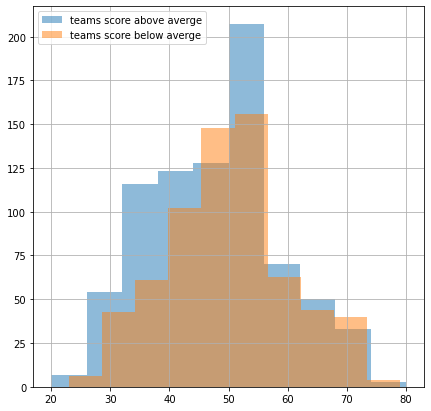

In [62]:
above_av_scor.buildUpPlayPassing.hist(figsize = (7,7),alpha = .5 , label = 'teams score above averge')
below_av_scor.buildUpPlayPassing.hist(figsize = (7,7),alpha = .5 , label = 'teams score below averge');
plt.legend();

---
----

### (Research Question 2) What are the top 5 teams that improved the most over the time period ? 

  ##### there are many attributes in which teams can improve 
  
  - we will make an assumed index to be applied on every team which is conceived from teams attributes 
  - will save the output of this in an additional column `points` which is only related to our EDA phase to use in further questions too

----

note : this index does not really exist in real life and it's only manufactured for the purpose of my personal EDA ..though i find it very expressing 

##### assumed index  (how it works) :

- first the score from  `goals_year` is going to have the biggest portion of the index's output (%50)
    - that of course because goals depend on the factor of luck too so i think (%50) of the index's output is enough
- some of the other att. in the data will share equally the remaining (%50)

In [19]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [20]:
for colu in team_df.columns:
    print(team_df[colu].value_counts())

1458    1
479     1
481     1
482     1
483     1
       ..
974     1
975     1
976     1
977     1
1       1
Name: id, Length: 1458, dtype: int64
301       8
110569    6
247       6
245       6
244       6
         ..
100646    1
182       1
100741    1
546       1
1898      1
Name: team_fifa_api_id, Length: 285, dtype: int64
8191    6
8602    6
8658    6
8655    6
8654    6
       ..
8457    1
6631    1
8596    1
6547    1
9824    1
Name: team_api_id, Length: 288, dtype: int64
2015-09-10 00:00:00    245
2011-02-22 00:00:00    244
2014-09-19 00:00:00    244
2012-02-22 00:00:00    242
2013-09-20 00:00:00    242
2010-02-22 00:00:00    241
Name: date, dtype: int64
50    96
30    70
55    67
45    66
65    64
70    63
52    62
60    59
48    53
53    47
47    42
49    40
54    39
35    39
67    39
58    38
66    38
46    38
64    37
63    36
40    33
59    29
38    27
61    26
57    26
51    24
56    24
62    24
68    22
42    18
41    18
44    15
69    13
36    13
34    12
43    12
39   

After checking value counts of all those columns i (assumed) that there are att. can directly affect the team performance and others that do not 

note : columns with the word 'class' will not be most suitable for usage in our index ..especially most of them do not have a numeric(int,float) value to be calculated 

---
we will avoid the 'class' type columns as possible

---

attributes that affect performance dirctly & positively:

- buildUpPlaySpeed
- chanceCreationPassing
- chanceCreationCrossing
- chanceCreationShooting
- defencePressure

attributes  that assumably do not affect  performance dirctly:

- defenceAggression
- defenceTeamWidth

we will exclude those from our index 


##### preparing for the index output  >>> `points` column

---
###### calculating performance portion using first  attributes  >> (50%) index value

will first find out the max value for every column to prepare to calculate proportional value for the attribute

- buildUpPlaySpeed

In [21]:
max_buildUpPlaySpeed = team_df['buildUpPlaySpeed'].max()
max_buildUpPlaySpeed

80

- buildUpPlayPassing

In [22]:
max_buildUpPlayPassing = team_df['buildUpPlayPassing'].max()
max_buildUpPlayPassing

80

- chanceCreationPassing

In [23]:
max_chanceCreationPassing = team_df['chanceCreationPassing'].max()
max_chanceCreationPassing

80

looks like they all have a max of 80 so will not calculate the rest 
- for calculating an attribute proportionality will only divide by 80 

---

let's go ahead and find the max score in our dataset

In [24]:
team_df['goals_year'].max()

121

calculating the `points` column

In [25]:
###  using the next columns to calculate the first 50% of the value of the index  >>  `points` column

##     `buildUpPlaySpeed`
##     `chanceCreationPassing`
##     `chanceCreationCrossing`
##     `chanceCreationShooting`
##     `defencePressure`

##  then using `goals_year` column to calculate the second 50% of the value of `points` column

team_df['points'] = 0.5*(team_df.apply(lambda row: (row.buildUpPlaySpeed)/80 , axis = 1)        +     \
                         team_df.apply(lambda row: (row.chanceCreationPassing)/80 , axis = 1)   +     \
                         team_df.apply(lambda row: (row.chanceCreationCrossing)/80 , axis = 1)  +     \
                         team_df.apply(lambda row: (row.chanceCreationShooting)/80 , axis = 1)  +     \
                         team_df.apply(lambda row: (row.defencePressure)/80 , axis = 1)      )  +     \
                    0.5*(team_df.apply(lambda row: (row.goals_year)/121 , axis = 1))
                        

In [26]:
team_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name,year,goals_year,points
0,485,673,9987,2010-02-22 00:00:00,45,Balanced,Little,45,Mixed,Organised,...,65,Press,70,Wide,Cover,KRC Genk,GEN,2010,65,1.893595
1,486,673,9987,2011-02-22 00:00:00,66,Balanced,Little,52,Mixed,Organised,...,47,Press,54,Normal,Offside Trap,KRC Genk,GEN,2011,47,2.044215
2,487,673,9987,2012-02-22 00:00:00,53,Balanced,Little,55,Mixed,Organised,...,45,Press,55,Normal,Cover,KRC Genk,GEN,2012,67,1.895610
3,488,673,9987,2013-09-20 00:00:00,58,Balanced,Little,38,Mixed,Organised,...,45,Press,55,Normal,Cover,KRC Genk,GEN,2013,20,1.807645
4,489,673,9987,2014-09-19 00:00:00,58,Balanced,Normal,38,Mixed,Organised,...,45,Press,55,Normal,Cover,KRC Genk,GEN,2014,26,1.832438


let's find out the top 5 teams that improved the most over the time period

but we will first make a new small dataframe `total_points` that has 3 columns 

- `teams_list` >>> teams api ids
- `sum_points_list`  >>> total points across the time period for each team
- `team_long_list`   >>>>>  that the long team name 

In [27]:
teams_api_id = list(team_df['team_api_id'].unique())

In [28]:
teams_list = []  
sum_points_list = []
team_long_list = []

for id_t in teams_api_id:
    teams_list.append(id_t)
    team = team_df[team_df['team_api_id'] == id_t]
    sum_p = team.points.sum()
    sum_points_list.append(sum_p)
    team_long = list(team.team_long_name.values)[0]
    team_long_list.append(team_long)

total_points = pd.DataFrame({'teams_list': teams_list , 'sum_points_list': sum_points_list , 'team_long_list': team_long_list}) 

let's sort by the value of our points sum 

In [33]:
total_points = total_points.sort_values(by='sum_points_list', ascending=False)

In [34]:
our_top5 = total_points.head(5)
our_top5

,teams_list,sum_points_list,team_long_list
179,9772,12.675052,SL Benfica
120,9875,12.630114,Napoli
86,8721,12.569886,VfL Wolfsburg
119,8686,12.559556,Roma
82,8178,12.441839,Bayer 04 Leverkusen


will subtract 12 from `sum_points_list` to make our bars look better both our `point` & `sum_points_list` columns are hypothetical any way

In [36]:
our_top5['sum_points_list'] = our_top5['sum_points_list'] - 12

######  according to my assumed `points` column  i do the following plot : 


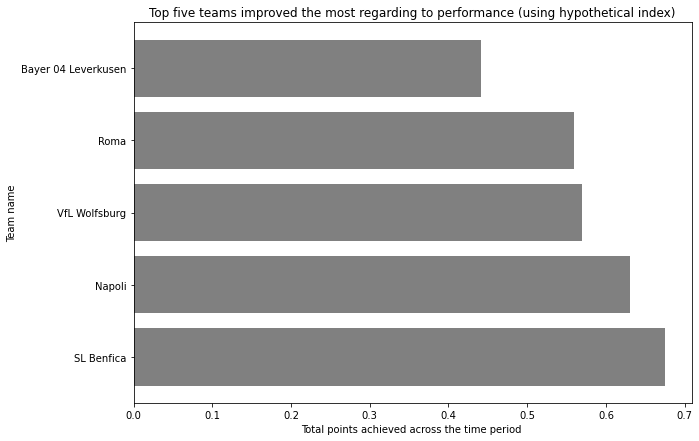

In [38]:
locations = [0,1,2,3,4]
heights = list(our_top5.sum_points_list.values)
labels = list(our_top5.team_long_list.values)
plt.figure(figsize=(10,7))
plt.barh(locations, heights , tick_label=labels ,color = 'grey')
plt.title('Top five teams improved the most regarding to performance (using hypothetical index)')
plt.ylabel('Team name')
plt.xlabel('Total points achieved across the time period ');

### (Research Question 3) What team scored the most over the time period ?

let's find out the top team that scored the most over the time period

but we will first make a new small dataframe `total_goals` that has 3 columns

 - teams_list >>> teams api ids
 - sum_goals_list >>> total points across the time period for each team
 - team_long_list >>>>> that the long team name



In [39]:
teams_api_id = list(team_df['team_api_id'].unique())

In [40]:
teams_list = []  
sum_goals_list = []
team_long_list = []

for id_t in teams_api_id:
    teams_list.append(id_t)
    team = team_df[team_df['team_api_id'] == id_t]
    sum_goals = team.goals_year.sum()
    sum_goals_list.append(sum_goals)
    team_long = list(team.team_long_name.values)[0]
    team_long_list.append(team_long)

total_goals = pd.DataFrame({'teams_list': teams_list , 'sum_goals_list': sum_goals_list , 'team_long_list': team_long_list}) 

In [89]:
total_goals = total_goals.sort_values(by = 'sum_goals_list' , ascending = False)
tf = total_goals.head(10)

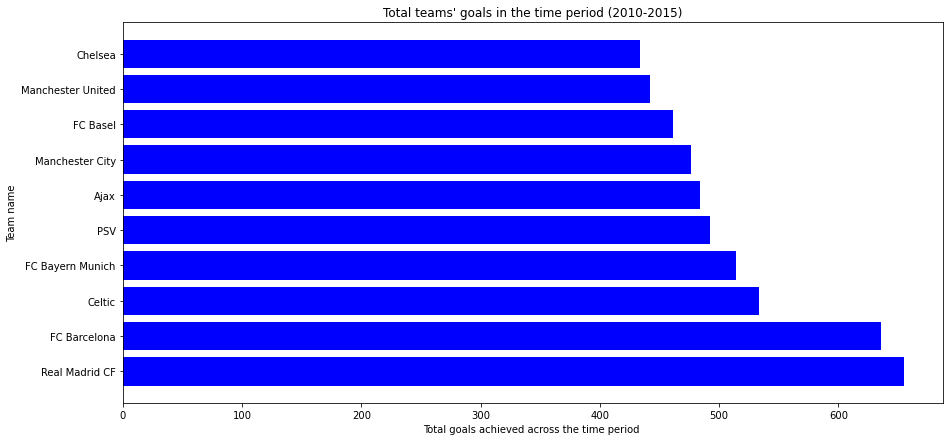

In [42]:
locations = list(range(0 , len(list(tf.sum_goals_list.values))))
heights = list(tf.sum_goals_list.values)
labels = list(tf.team_long_list.values)
plt.figure(figsize=(14.7,7))
plt.barh(locations, heights , tick_label=labels ,color = 'blue')
plt.title("Total teams' goals in the time period (2010-2015)")
plt.ylabel('Team name')
plt.xlabel('Total goals achieved across the time period ');

### Questions about player

### (Research Question 4) Which players had the most penalties? 


first let's load the player data to start answering players questions 

In [43]:
player_df = pd.read_csv('player_clean.csv')

In [44]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180354 entries, 0 to 180353
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   player_name          180354 non-null  object 
 2   birthday             180354 non-null  object 
 3   height               180354 non-null  float64
 4   weight               180354 non-null  int64  
 5   id                   180354 non-null  int64  
 6   player_api_id        180354 non-null  int64  
 7   date                 180354 non-null  object 
 8   overall_rating       180354 non-null  float64
 9   potential            180354 non-null  float64
 10  preferred_foot       180354 non-null  object 
 11  attacking_work_rate  180354 non-null  object 
 12  defensive_work_rate  180354 non-null  object 
 13  crossing             180354 non-null  float64
 14  finishing            180354 non-null  float64
 15  heading_accuracy 

In [45]:
player_df = player_df.sort_values(by = 'penalties' , ascending = False)
### making another dataframe just to see it better
player_df_penalties = player_df[['penalties','player_name']]
player_df_penalties = player_df_penalties.drop_duplicates()
player_df_penalties_10 = player_df_penalties.head(10)

In [46]:
player_df_penalties_10

,penalties,player_name
146680,96,Rickie Lambert
146684,95,Rickie Lambert
11795,95,Andrea Pirlo
111325,95,Mario Balotelli
177176,95,Xavi Hernandez
137745,95,Paul Scholes
71086,94,Iker Casillas
26763,94,Cesc Fabregas
146689,94,Rickie Lambert
39780,94,David Trezeguet


In [47]:
## calculating proportionality for penalities and storing them in the same column for a more clear chart
## through dividing by the column max value `96 `
player_df_penalties_10['penalties'] = player_df_penalties_10['penalties']

In [92]:
player_df_penalties_10

,penalties,player_name
146680,96,Rickie Lambert
146684,95,Rickie Lambert
11795,95,Andrea Pirlo
111325,95,Mario Balotelli
177176,95,Xavi Hernandez
137745,95,Paul Scholes
71086,94,Iker Casillas
26763,94,Cesc Fabregas
146689,94,Rickie Lambert
39780,94,David Trezeguet


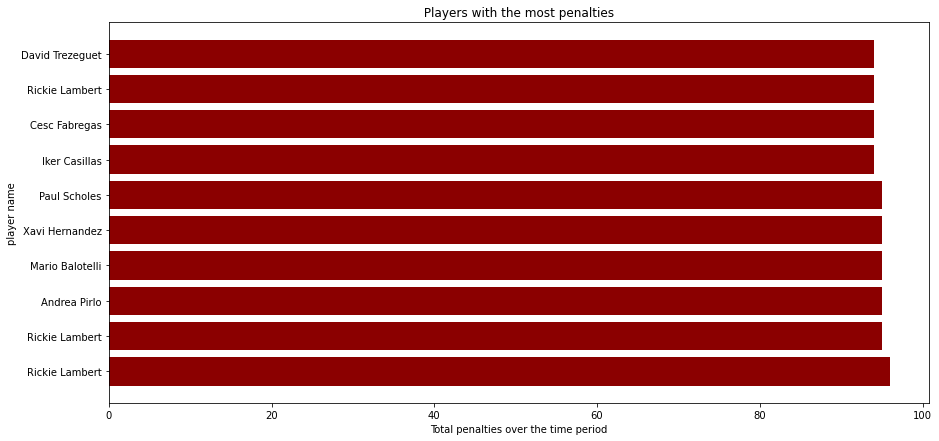

In [49]:
locations = list(range(0 , len(list(player_df_penalties_10.player_name.values))))
heights = list(player_df_penalties_10.penalties.values)
labels = list(player_df_penalties_10.player_name.values)
plt.figure(figsize=(14.7,7))
plt.barh(locations, heights , tick_label=labels ,color = 'darkred')
plt.title(" Players with the most penalties ")
plt.ylabel('player name')
plt.xlabel('Total penalties over the time period');

### (Research Question 5) What player attributes lead to the highest overall ratings ?

In [63]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 146680 to 96074
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_fifa_api_id   180354 non-null  int64  
 1   player_name          180354 non-null  object 
 2   birthday             180354 non-null  object 
 3   height               180354 non-null  float64
 4   weight               180354 non-null  int64  
 5   id                   180354 non-null  int64  
 6   player_api_id        180354 non-null  int64  
 7   date                 180354 non-null  object 
 8   overall_rating       180354 non-null  float64
 9   potential            180354 non-null  float64
 10  preferred_foot       180354 non-null  object 
 11  attacking_work_rate  180354 non-null  object 
 12  defensive_work_rate  180354 non-null  object 
 13  crossing             180354 non-null  float64
 14  finishing            180354 non-null  float64
 15  heading_accur

In [65]:
player_df.describe()

,player_fifa_api_id,height,weight,id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,...,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.000000,180354.00000
mean,166822.125803,181.873388,168.761380,91995.886274,137653.145514,68.635317,73.479457,55.142071,49.962136,57.263476,...,57.868176,54.933448,46.757433,50.354065,48.029342,14.696685,15.947786,20.526304,16.015043,16.32531
std,52821.443279,6.405167,15.111161,53092.657914,137599.735284,7.027950,6.581963,17.247231,19.041760,16.478716,...,15.152408,15.556645,21.226730,21.496289,21.592830,16.841454,15.841297,21.143898,16.070772,17.18545
min,2.000000,157.480000,117.000000,1.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,156616.000000,177.800000,159.000000,46074.250000,35451.000000,64.000000,69.000000,45.000000,34.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.00000
50%,183792.000000,182.880000,168.000000,92003.500000,80291.000000,69.000000,74.000000,59.000000,53.000000,60.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.00000
75%,200138.000000,185.420000,179.000000,137935.750000,192841.000000,73.000000,78.000000,68.000000,65.000000,68.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.00000
max,234141.000000,208.280000,243.000000,183978.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.00000


first we will calculate the mean of the 'overall_rating' column

In [64]:
mean_ov_r = player_df['overall_rating'].mean()

In [69]:
### and we will mask our df with it to find players with the highest over_all rating 
player_high_ov_r = player_df[player_df['overall_rating']   > mean_ov_r]
### and we will mask our df with it to find players with the lowest over_all rating 
player_low_ov_r = player_df[player_df['overall_rating']   < mean_ov_r]

In [70]:
player_high_ov_r.describe()

,player_fifa_api_id,height,weight,id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,...,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000,92427.000000
mean,155762.887360,181.784876,169.304294,91580.691346,103557.488699,74.064321,77.489035,60.015721,54.897357,61.276737,...,63.081264,59.688414,49.109200,53.289504,50.428197,14.970214,16.016380,21.095968,16.104082,16.403724
std,57000.231022,6.504276,15.260864,53229.880230,106772.796414,4.061755,4.885260,17.646203,19.568588,16.963884,...,14.751472,15.684715,23.034808,23.014462,23.244957,17.875479,16.916882,22.762401,17.234885,18.299997
min,2.000000,157.480000,117.000000,6.000000,2752.000000,69.000000,59.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,140497.000000,177.800000,159.000000,45757.000000,31291.000000,71.000000,74.000000,52.000000,40.000000,54.000000,...,56.000000,51.000000,25.000000,30.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,176619.000000,182.880000,170.000000,90701.000000,42035.000000,73.000000,77.000000,65.000000,60.000000,65.000000,...,66.000000,63.000000,53.000000,60.000000,56.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,192596.000000,185.420000,179.000000,137539.500000,160370.000000,76.000000,81.000000,72.000000,70.000000,73.000000,...,73.000000,71.000000,71.000000,74.000000,72.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,232693.000000,203.200000,243.000000,183978.000000,722766.000000,94.000000,97.000000,95.000000,97.000000,98.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [72]:
player_low_ov_r.describe()

,player_fifa_api_id,height,weight,id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,...,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000,87927.000000
mean,178447.363006,181.966430,168.190681,92432.330388,173493.777770,62.928463,69.264674,50.018993,44.774336,53.044821,...,52.388288,49.935128,44.285305,47.268393,45.507717,14.409158,15.875681,19.927485,15.921446,16.242883
std,45210.755367,6.298002,14.931000,52944.821871,156032.425611,4.518733,5.395430,15.219124,16.990995,14.824555,...,13.550066,13.749745,18.828957,19.299815,19.390176,15.676129,14.625388,19.278755,14.747870,15.929703
min,2.000000,157.480000,117.000000,1.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,169394.000000,177.800000,159.000000,46188.500000,39842.000000,61.000000,66.000000,41.000000,30.000000,46.000000,...,44.000000,42.000000,25.000000,27.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,189736.000000,182.880000,168.000000,93347.000000,139806.000000,64.000000,69.000000,54.000000,47.000000,56.000000,...,55.000000,51.000000,49.000000,54.000000,52.000000,10.000000,12.000000,12.000000,12.000000,11.000000
75%,205158.000000,185.420000,179.000000,138630.500000,246317.000000,66.000000,73.000000,62.000000,60.000000,64.000000,...,63.000000,60.000000,62.000000,65.000000,63.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,234141.000000,208.280000,243.000000,183953.000000,750584.000000,68.000000,91.000000,86.000000,85.000000,94.000000,...,91.000000,90.000000,84.000000,83.000000,88.000000,88.000000,80.000000,87.000000,79.000000,85.000000


all attributes seems to have a positive corelation with the overall rating and surprisingly even players with the most penalties have the above average `overall_rating` 

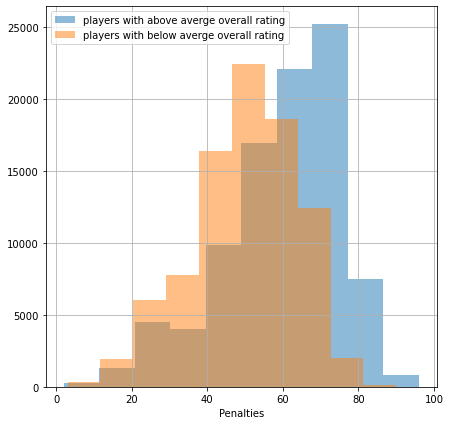

In [76]:
player_high_ov_r.penalties.hist(figsize = (7,7),alpha = .5 ,bins = 10, label = 'players with above averge overall rating')
player_low_ov_r.penalties.hist(figsize = (7,7),alpha = .5 ,bins = 10, label  = 'players with below averge overall rating');
plt.xlabel('Penalties')
plt.legend();

### (Research Question 6) Does  players' Footedness affect their potential ?

first lets mask our dataframe with 'right' & 'left' values in the  `preferred_foot` column
to find each group

---
and then calculate the mean potential value for each

In [80]:
player_foot_R = player_df[player_df['preferred_foot'] == 'right']

In [81]:
player_foot_R.potential.mean()

73.4663001754167

In [82]:
player_foot_l = player_df[player_df['preferred_foot'] == 'left']

In [83]:
player_foot_l.potential.mean()

73.52009885052259

numbers are really close but it tends a little  to the left_footed players

so players that have a `left` preferred_foot tend to have the highest value in the `potential` column 

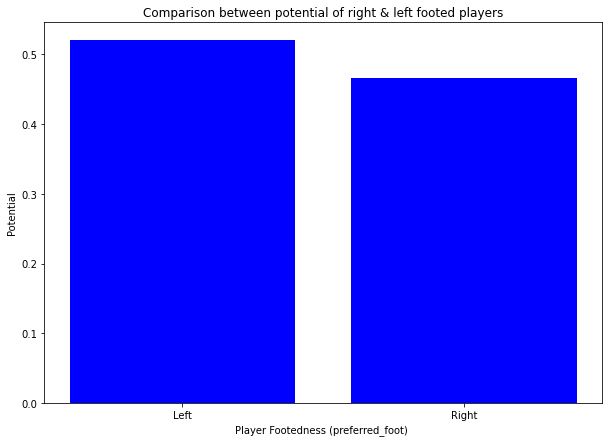

In [88]:
locations = [0,1]
heights = [player_foot_l.potential.mean() -73 , player_foot_R.potential.mean()-73]
labels = ['Left' , 'Right']
plt.figure(figsize=(10,7))
plt.bar(locations, heights , tick_label=labels ,color = 'blue')
plt.title('Comparison between potential of right & left footed players')
plt.ylabel('Potential')
plt.xlabel('Player Footedness (preferred_foot) ');

<a id='conclusions'></a>
## Conclusions

First i am going to discuss limitations in my EDA phase :


- 1) when i was trying to answer (Research Question 1) What are the top 5 teams that improved the most over the time period ? 
   
   - i manufactured an index to measure teams' performance  which is the sum of two parts a value calculated from    team attributes (50%) and the other is calculated from teams' goals (50%) and this index is a mere assumption 

- 2) when i came by (Research Question 2) What team attributes lead to the most victories?
  
   - i chose only columns with numeric values(int,float) which is note necessarily the most accurate to answer the
     question but i preferred them because of the ease to plot with them 
     
- 3) when i came by (Research Question 3) What team scored the most over the time period ?
  
   - i used the `goals_year` column which i generated earlier and may be slightly not accurate compared to teams        score in real world 

- 4) when i came by (Research Question 4) Which players had the most penalties?
  
   - i used the bar chart to express my findings and it may not be the best way to do that because values are so        tight

- 5) when i came by (Research Question 5) What player attributes lead to the highest overall ratings ?
  
   - i used the mean measure do differentiate between attributes which is one of many measures to use but i found      it the most expresive

- 6) when i came by (Research Question 6) Does players' Footedness affect their potential ?
    
  - i subtracted 73 from the value of potential for both right & left footed players to make the chart look better


Second i would like to share the following findings :

- From my point of view seems like all team attributes are related to most score except the `buildUpPlayPassing` att. 

- From my point of view top 5 teams which improved the most accordind to my index of performance:

     - 1) SL Benfica
     - 2) Napoli
     - 3) Wolfsburg
     - 4) Roma
     - 5) Bayer 04 Leverkusen

- The team with the most goals in the time period is 'Real Madrid'

- Players with most penalties respectively are :
   
     - Rickie Lambert
     - Andrea Pirlo
     - Mario Balotelli
     - Xavi Hernandez
     - Paul Scholes
     - Iker Casillas
     - Cesc Fabregas
     - Rickie Lambert
     - David Trezeguet

- all player attributes seems to have a positive corelation with the overall rating and surprisingly even players with the most penalties have the above average 


- players that have a `left` preferred_foot tend to have the highest value in the `potential` column

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])